# Load all necessary moduls

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import*
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
%matplotlib inline

# Load the dataset that needed

In [2]:
df=pd.read_csv("ex2data1.txt",names=["Exam 1","Exam 2","Admitted"])

In [3]:
df.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


# Plot the data points

In [4]:
positive = df[df['Admitted'].isin([1])]
negative = df[df['Admitted'].isin([0])]

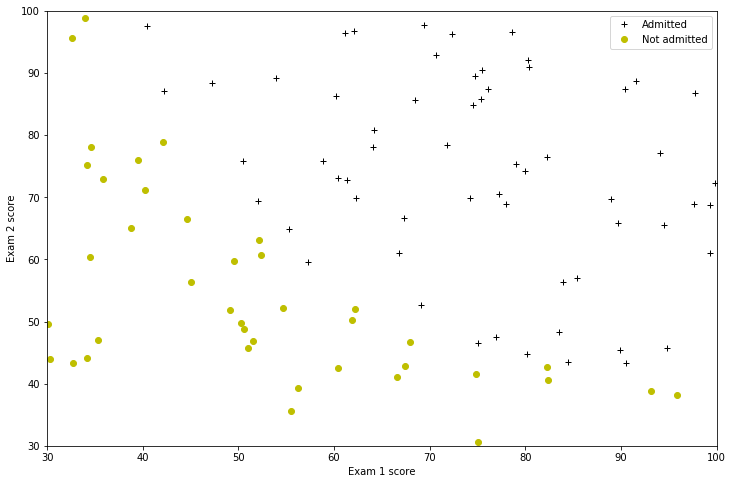

In [5]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(positive["Exam 1"],positive["Exam 2"],'k+',label='Admitted')
ax.plot(negative["Exam 1"],negative["Exam 2"],'yo',label='Not admitted')
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
ax.set_xlim(30,100)
ax.set_ylim(30,100)
ax.legend(loc=1)

# Define sigmoid function,plot it

In [6]:
def sigmoid(z):
    return 1/ (1+np.exp(-z))

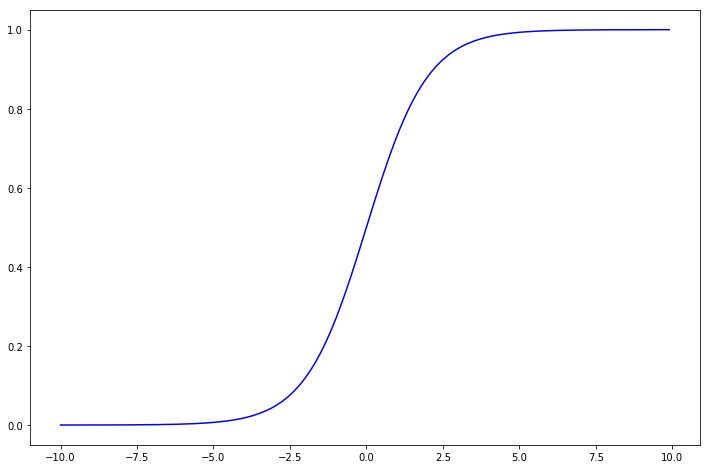

In [7]:
nums=np.arange(-10,10,.1)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(nums,sigmoid(nums),"b")

# Define cost function

In [8]:
def costFunction(theta,X,Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    first = np.multiply(-Y,np.log(sigmoid(X*theta.T)))
    second=np.multiply((1-Y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/len(X)

# Insert constant 1 to the front of the data

In [9]:
df.insert(0,"Ones",1)

# Split the data to X and Y

In [10]:
X=df.loc[:,["Ones","Exam 1","Exam 2"]]
Y=df.loc[:,["Admitted"]]
X=np.array(X.values)
Y=np.array(Y.values)
theta=np.zeros(3)

In [11]:
costFunction(theta,X,Y)

0.69314718055994529

# Define gradient function

In [12]:
def gradient(theta,X,Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    
    error=sigmoid(X*theta.T)-Y
    
    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
    return grad

In [13]:
gradient(theta,X,Y)

array([ -0.1       , -12.00921659, -11.26284221])

# Find optimal parameters

In [14]:
import scipy.optimize as opt
result=opt.fmin_tnc(func=costFunction,x0=theta,fprime=gradient,args=(X,Y))
print(result[0])

[-25.16131861   0.20623159   0.20147149]


In [60]:
result = minimize(costFunction, theta, args=(X,Y), method="BFGS", jac=gradient, options={'maxiter':400})
result

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


      fun: 0.20349770158944389
 hess_inv: array([[  3.31474479e+03,  -2.63892205e+01,  -2.70237122e+01],
       [ -2.63892205e+01,   2.23869433e-01,   2.02682332e-01],
       [ -2.70237122e+01,   2.02682332e-01,   2.35335117e-01]])
      jac: array([ -9.52476815e-09,  -9.31921315e-07,  -2.82608926e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [54]:
costFunction(result.x,X,Y)

0.20349770158944389

In [16]:
def predict(theta,X):
    probability=sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [17]:
theta_min=np.matrix(result[0])
predictions=predict(theta_min,X)
correct=[1 if ((a==1 and b==1) or (a == 0 and b == 0)) else 0 for (a,b) in zip(predictions,Y)]
accuracy=(sum(map(int,correct))%len(correct))
print("Accuracy = {0}%".format(accuracy))

Accuracy = 89%


# Plot the decision boundary

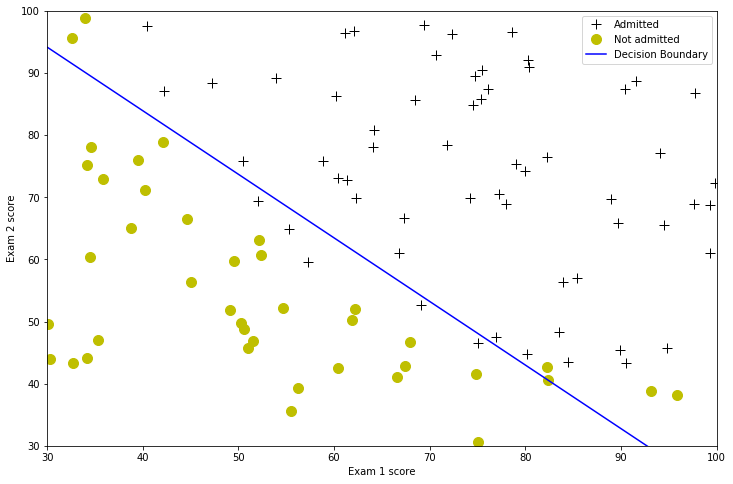

In [18]:
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./result[0][2])*(result[0][0] + result[0][1]*boundary_xs)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(positive["Exam 1"],positive["Exam 2"],'k+',label='Admitted',markersize=10)
ax.plot(negative["Exam 1"],negative["Exam 2"],'yo',label='Not admitted',markersize=10)
ax.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
ax.set_xlim(30,100)
ax.set_ylim(30,100)
ax.legend(loc=1)

# Predict student with exam 1 score of 45 and exam 2 score of 85

In [19]:
from scipy.special import expit #Vectorized sigmoid function
def h(mytheta,myX):
    return expit(np.dot(myX,mytheta))

In [20]:
h(result[0],np.array([1,45,85]))

0.77629062281574479

In [21]:
temp=np.array([1,45,85])
temp=np.reshape(temp,(1,3))
prob=sigmoid(temp*theta_min.T).tolist()[0][0]

In [22]:
print("Student with exam 1 score of 45 and exam 2 score of 85 has "+str(prob*100)+"% to get admitted")

Student with exam 1 score of 45 and exam 2 score of 85 has 77.62906228157448% to get admitted


# Regularized logistic regression

In [23]:
df1=pd.read_csv("ex2data2.txt",names=["Test 1","Test 2","Accepted"])
df1.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0,0.5,'Test 2 Score')

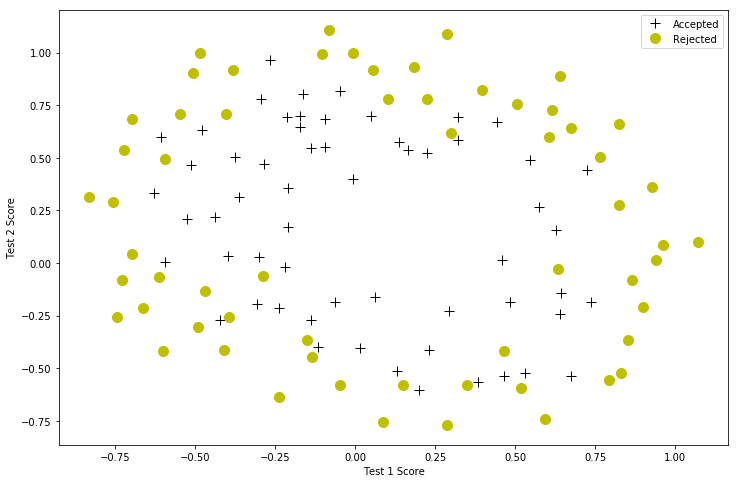

In [24]:
positive = df1[df1['Accepted'].isin([1])]
negative = df1[df1['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(positive["Test 1"],positive["Test 2"],'k+',label='Accepted',markersize=10)
ax.plot(negative["Test 1"],negative["Test 2"],'yo',label='Rejected',markersize=10)
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [25]:
degree=5
x1=df1["Test 1"]
x2=df1["Test 2"]
df1.insert(3,"Ones",1)

for i in range(1,degree):
    for j in range(0,i):
        df1["F"+str(i)+str(j)]=np.power(x1,i-j)*np.power(x2,j)
        
df1.drop("Test 1",axis=1,inplace=True)
df1.drop("Test 2",axis=1,inplace=True)

df1.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [26]:
def costReg(theta,X,Y,alpha=1):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(Y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (alpha / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [27]:
def gradientReg(theta, X, y, learningRate=0):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [28]:
# set X and y (remember from above that we moved the label to column 0)
cols = df1.shape[1]
X2 = df1.iloc[:,1:cols]
y2 = df1.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

In [29]:
cost2=costReg(theta2,X2,y2)
cost2

0.6931471805599454

In [30]:
gradientReg(theta2,X2,y2)

array([ 0.00847458,  0.01878809,  0.05034464,  0.01150133,  0.01835599,
        0.00732393,  0.00819244,  0.03934862,  0.00223924,  0.01286005,
        0.00309594])

In [61]:
result2=minimize(costReg,theta2,args=(X2,y2,0),method="BFGS",jac=gradientReg,options={"maxiter":3000,"disp":False})

In [62]:
new_theta,mincost=result2.x,result2.fun

In [63]:
new_theta

array([  0.35882823,  -3.22271347,  18.96778412,  -4.25805988,
        18.23143165,  20.36331689,   8.94087463, -43.77004086,
       -17.92719618, -50.74482291,  -2.83340629])

In [64]:
theta_min = np.matrix(new_theta)
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 91%
